## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.metrics import f1_score

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Data Pre-processing

In [8]:
data = pd.read_csv("Data.csv")
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [9]:
data.shape

(4101, 27)

In [10]:
data = data.dropna(axis = 0, how ='any') 
data.shape

(4098, 27)

In [11]:
data['Date'].unique

<bound method Series.unique of 0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
4096    2016-06-27
4097    2016-06-28
4098    2016-06-29
4099    2016-06-30
4100    2016-07-01
Name: Date, Length: 4098, dtype: object>

In [12]:
data['Label'].dtype

dtype('int64')

**Label** :
- 0 : stock price either be constant or decreasd
- 1 : stock price increase

In [13]:
train = data[ data['Date'] < '20150101' ]
test  = data[ data['Date'] > '20141231' ]

In [14]:
train.shape ,test.shape

((3972, 27), (378, 27))

##  Data Wrangling

In [15]:
train_corpus = []
for i in range(len(train)) :
    
    news = train.iloc[i ,2:].replace('[^a-zA-z]' ,' ')
    news = news.str.lower()
    news = ' '.join(news)
    
    train_corpus.append(news)

In [16]:
train_corpus

["a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title",
 "scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main

In [17]:
test_corpus = []

for i in range(len(test)) :
    
    news = test.iloc[i ,2:].replace('[^a-zA-z]' ,' ')
    #news = test.iloc[i ,2:]
    news = news.str.lower()
    news = ' '.join(news)
    
    test_corpus.append(news)    

In [18]:
test_corpus

['most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles, diet or even inherited genes, new research suggests. random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues. iran dismissed united states efforts to fight islamic state as a ploy to advance u.s. policies in the region: "the reality is that the united states is not acting to eliminate daesh. they are not even interested in weakening daesh, they are only interested in managing it" poll: one in 8 germans would join anti-muslim marches uk royal family\'s prince andrew named in us lawsuit over underage sex allegations some 40 asylum-seekers refused to leave the bus when they arrived at their destination in rural northern sweden, demanding that they be taken back to malm or "some big city". pakistani boat blows self up after india navy chase. all four people on board the vessel from near the pakistani port city of karachi are b

## Model Preperations

In [19]:
## Bag of words
cv = CountVectorizer(ngram_range=(2,2))

In [20]:
train_X = cv.fit_transform(train_corpus)
test_X  = cv.transform(test_corpus)

**1.Logistic Regression**

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(train_X ,train['Label'])

LogisticRegression()

In [23]:
y_pred = lr.predict(test_X)

In [24]:
lr_acc = accuracy_score(test['Label'] ,y_pred)
lr_acc

0.8518518518518519

In [25]:
confusion_matrix(test['Label'] ,y_pred)

array([[157,  29],
       [ 27, 165]], dtype=int64)

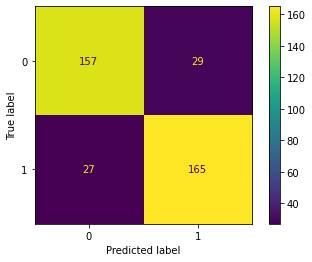

In [26]:
plot_confusion_matrix(lr ,test_X ,test['Label'])

In [27]:
lr_f1 = f1_score(test['Label'] ,y_pred)
lr_f1

0.854922279792746

In [28]:
print(classification_report(test['Label'] ,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       186
           1       0.85      0.86      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



**2. Decision Tree**

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(train_X ,train['Label'])

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(test_X)

In [32]:
dt_acc = accuracy_score(test['Label'] ,y_pred)
dt_acc

0.8201058201058201

In [33]:
confusion_matrix(test['Label'] ,y_pred)

array([[153,  33],
       [ 35, 157]], dtype=int64)

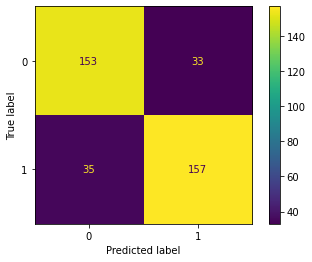

In [34]:
plot_confusion_matrix(dt ,test_X ,test['Label'])

In [35]:
dt_f1 = f1_score(test['Label'] ,y_pred)
dt_f1

0.8219895287958116

In [36]:
print(classification_report(test['Label'] ,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       186
           1       0.83      0.82      0.82       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



**3.Random Forest**

In [37]:
rf = RandomForestClassifier(
                             n_estimators = 200 ,
                             criterion    = 'entropy'
                           )

In [38]:
rf.fit(train_X ,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [39]:
y_pred = rf.predict(test_X)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
rf_acc = accuracy_score(test['Label'] ,y_pred)
rf_acc

0.8544973544973545

In [41]:
confusion_matrix(test['Label'] ,y_pred)

array([[139,  47],
       [  8, 184]], dtype=int64)

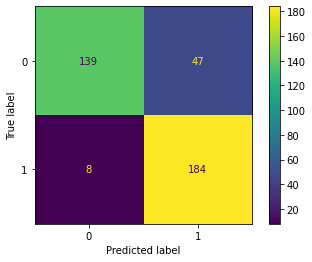

In [42]:
plot_confusion_matrix(rf ,test_X ,test['Label'])

In [43]:
rf_f1 = f1_score(test['Label'] ,y_pred)
rf_f1

0.8699763593380614

In [44]:
print(classification_report(test['Label'] ,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.83       186
           1       0.80      0.96      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



**4. Gradient Boosting**

In [45]:
gb = GradientBoostingClassifier()

In [46]:
gb.fit(train_X ,train['Label'])

GradientBoostingClassifier()

In [47]:
y_pred = gb.predict(test_X)

In [48]:
gb_acc = accuracy_score(test['Label'] ,y_pred)
gb_acc

0.7592592592592593

In [49]:
confusion_matrix(test['Label'] ,y_pred)

array([[111,  75],
       [ 16, 176]], dtype=int64)

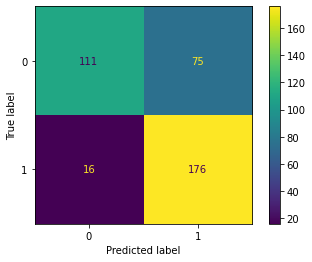

In [50]:
plot_confusion_matrix(gb ,test_X ,test['Label'])

In [51]:
gb_f1 = f1_score(test['Label'] ,y_pred)
gb_f1

0.7945823927765236

In [52]:
print(classification_report(test['Label'] ,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71       186
           1       0.70      0.92      0.79       192

    accuracy                           0.76       378
   macro avg       0.79      0.76      0.75       378
weighted avg       0.79      0.76      0.75       378



**5. Multinomial Naive Bayes**

In [53]:
nb = MultinomialNB()

In [54]:
nb.fit(train_X ,train['Label'])

MultinomialNB()

In [70]:
y_pred = nb.predict(test_X)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [71]:
nb_acc = accuracy_score(test['Label'] ,y_pred)
nb_acc

0.8465608465608465

In [72]:
confusion_matrix(test['Label'] ,y_pred)

array([[137,  49],
       [  9, 183]], dtype=int64)

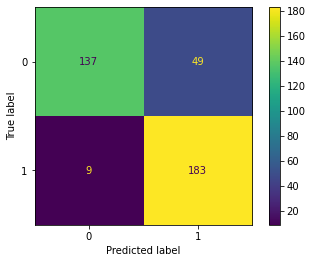

In [73]:
plot_confusion_matrix(nb ,test_X ,test['Label'])

In [74]:
nb_f1 = f1_score(test['Label'] ,y_pred)
nb_f1

0.8632075471698114

In [75]:
print(classification_report(test['Label'] ,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378



**6. Passive Classifier**

In [76]:
pc = PassiveAggressiveClassifier()

In [77]:
pc.fit(train_X ,train['Label'])

PassiveAggressiveClassifier()

In [78]:
y_pred = pc.predict(test_X)

In [79]:
pc_acc = accuracy_score(test['Label'] ,y_pred)
pc_acc

0.8518518518518519

In [80]:
confusion_matrix(test['Label'] ,y_pred)

array([[159,  27],
       [ 29, 163]], dtype=int64)

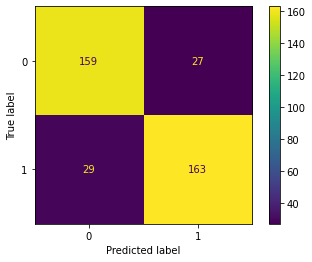

In [81]:
plot_confusion_matrix(pc ,test_X ,test['Label'])

In [82]:
pc_f1 = f1_score(test['Label'] ,y_pred)
pc_f1

0.8534031413612566

In [83]:
print(classification_report(test['Label'] ,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       186
           1       0.86      0.85      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



## Summary : Model 

In [84]:
models = pd.DataFrame({
                        'Model'    : ['Logistic Regression' ,'Decision Tree' ,'Random Forest' ,'Gradient Boosting' ,'Multinomial NB' ,'Passive Classifier'] ,
                        'Accuracy' : [lr_acc ,dt_acc ,rf_acc ,gb_acc ,nb_acc ,pc_acc] ,
                        'F1 Score' : [lr_f1 ,dt_f1 ,rf_f1 ,gb_f1 ,nb_f1 ,pc_f1]
                     }).sort_values(by=['Accuracy' ,'F1 Score'] ,ascending=False)

In [85]:
models = models.reset_index(drop=True)
models

,Model,Accuracy,F1 Score
0,Random Forest,0.854497,0.869976
1,Logistic Regression,0.851852,0.854922
2,Passive Classifier,0.851852,0.853403
3,Multinomial NB,0.846561,0.863208
4,Decision Tree,0.820106,0.821990
5,Gradient Boosting,0.759259,0.794582
